### Group csv files by genotype/timepoint
##### raw data in folder: raw
##### results are organized in folder: data_stage_1

In [1]:
import os
import pandas as pd
from collections import defaultdict

#folder_path = "/Users/donglinhan/Desktop/TU2025/raw/Aedes"  
folder_path = "/Users/donglinhan/Desktop/TU2025/raw/Culex"  
grouped_data = defaultdict(list)

for filename in os.listdir(folder_path):
    if filename.endswith(".csv"):
        group = filename.split("_")[-1].replace(".csv", "")
        file_path = os.path.join(folder_path, filename)
        data = pd.read_csv(file_path, header=0, names=[filename])
        grouped_data[group].append(data)

output_folder = "grouped_excel_files"  
os.makedirs(output_folder, exist_ok=True)

for group, data_list in grouped_data.items():
    combined_df = pd.concat(data_list, axis=1)
    output_file = os.path.join(output_folder, f"{group}.xlsx")
    combined_df.to_excel(output_file, index=False)

print(f"Excel files created in folder: {output_folder}")

Excel files created in folder: grouped_excel_files


### Transform data by type of behavior: flight - 3, probe - 2, walk - 1, rest - 0
##### Note that reducing from 30 classes of VAME output to 4 type of behavior is genus specific 
##### results are organized in folder: data_stage_2

In [3]:
#For Aedes
import os
import pandas as pd

input_folder = "/Users/donglinhan/Desktop/TU2025/data_stage_1/Aedes" 
output_folder = "/Users/donglinhan/Desktop/TU2025/data_stage_2/Aedes"  
os.makedirs(output_folder, exist_ok=True)

# Transformation rules
value_mapping = {
    0: 0, 3: 0, 5: 0, 7: 0, 8: 0, 10: 0, 11: 0, 13: 0, 15: 0, 17: 0, 18: 0,
    19: 0, 20: 0, 23: 0, 24: 0, 25: 0, 26: 0, 27: 0, 28: 0, 29: 0,
    22: 2,
    4: 3, 6: 3,
    1: 1, 2: 1, 9: 1, 12: 1, 14: 1, 16: 1, 21: 1
}

# Process each Excel file
for filename in os.listdir(input_folder):
    if filename.endswith(".xlsx"):
        file_path = os.path.join(input_folder, filename)
        df = pd.read_excel(file_path)        
        df = df.iloc[:39600, :]  # Crop to the first 39,600 rows        
        df = df.fillna(0) # Fill missing values with 0
        df = df.applymap(lambda x: value_mapping.get(x, x))
        output_file = os.path.join(output_folder, filename)
        df.to_excel(output_file, index=False)

print(f"Transformed Excel files saved in folder: {output_folder}")


Transformed Excel files saved in folder: /Users/donglinhan/Desktop/TU2025/data_stage_2/Aedes


In [4]:
#For Anopheles
import os
import pandas as pd

input_folder = "/Users/donglinhan/Desktop/TU2025/data_stage_1/Anopheles" 
output_folder = "/Users/donglinhan/Desktop/TU2025/data_stage_2/Anopheles"  
os.makedirs(output_folder, exist_ok=True)

# Transformation rules
value_mapping = {
    1: 0, 2: 0, 3: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0,
    14: 0, 15: 0, 16: 0, 17: 0, 18: 0, 19: 0, 20: 0, 21: 0, 22: 0, 23: 0,
    24: 0, 27: 0, 29: 0,
    26: 2,
    0: 3, 13: 3,
    4: 1, 25: 1, 28: 1
}

# Process each Excel file
for filename in os.listdir(input_folder):
    if filename.endswith(".xlsx"):
        file_path = os.path.join(input_folder, filename)
        df = pd.read_excel(file_path)        
        df = df.iloc[:39600, :]  # Crop to the first 39,600 rows        
        df = df.fillna(0) # Fill missing values with 0
        df = df.applymap(lambda x: value_mapping.get(x, x))
        output_file = os.path.join(output_folder, filename)
        df.to_excel(output_file, index=False)

print(f"Transformed Excel files saved in folder: {output_folder}")


Transformed Excel files saved in folder: /Users/donglinhan/Desktop/TU2025/data_stage_2/Anopheles


In [2]:
#For Culex
import os
import pandas as pd

input_folder = "/Users/donglinhan/Desktop/TU2025/data_stage_1/Culex" 
output_folder = "/Users/donglinhan/Desktop/TU2025/data_stage_2/Culex"  
os.makedirs(output_folder, exist_ok=True)

# Transformation rules
value_mapping = {
    0: 0, 1: 0, 2: 0, 5: 0, 8: 0, 9: 0, 12: 0, 13: 0, 14: 0, 15: 0, 18: 0,
    19: 0, 20: 0, 21: 0, 22: 0, 23: 0, 24: 0, 25: 0, 26: 0, 27: 0, 28: 0, 29: 0,
    17: 2,
    10: 3,
    3: 1, 4: 1, 6: 1, 7: 1, 11: 1, 16: 1
}

# Process each Excel file
for filename in os.listdir(input_folder):
    if filename.endswith(".xlsx"):
        file_path = os.path.join(input_folder, filename)
        df = pd.read_excel(file_path)        
        df = df.iloc[:39600, :]  # Crop to the first 39,600 rows        
        df = df.fillna(0) # Fill missing values with 0
        df = df.applymap(lambda x: value_mapping.get(x, x))
        output_file = os.path.join(output_folder, filename)
        df.to_excel(output_file, index=False)

print(f"Transformed Excel files saved in folder: {output_folder}")


Transformed Excel files saved in folder: /Users/donglinhan/Desktop/TU2025/data_stage_2/Culex


### Generate stats on the three types of behavior to apply noise filter (10% cut-off)

In [8]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def get_behavior_durations(series):
    durations = {1: [], 2: [], 3: []}
    prev_value = 0
    length = 0
    
    for value in series:
        if value in [1, 2, 3]:  
            if value == prev_value:  
                length += 1 
            else:
                if prev_value in [1, 2, 3] and length > 0:
                    durations[prev_value].append(length)
                length = 1  
        else:
            if prev_value in [1, 2, 3] and length > 0:
                durations[prev_value].append(length)
            length = 0  
        
        prev_value = value
    
    if prev_value in [1, 2, 3] and length > 0:
        durations[prev_value].append(length)

    return durations


file_path = "/Users/donglinhan/Desktop/TU2025/data_stage_2/Aedes/LVP0.xlsx" 
df = pd.read_excel(file_path)
all_durations = {1: [], 2: [], 3: []}
for col in df.columns:
    durations = get_behavior_durations(df[col])
    for behavior in [1, 2, 3]:
        all_durations[behavior].extend(durations[behavior])
durations_df = pd.DataFrame({k: pd.Series(v) for k, v in all_durations.items()})
summary = durations_df.describe()
percentiles = {behavior: {
    "bottom_10%": durations_df[behavior].quantile(0.10),
    "top_10%": durations_df[behavior].quantile(0.90)
} for behavior in [1, 2, 3]}
print("Summary Statistics: Aedes")
print(summary)
print("\nTop and Bottom 10% Durations: Aedes")
for behavior, values in percentiles.items():
    print(f"Behavior {behavior}: Bottom 10% = {values['bottom_10%']}, Top 10% = {values['top_10%']}")

file_path = "/Users/donglinhan/Desktop/TU2025/data_stage_2/Anopheles/AGA0.xlsx" 
df = pd.read_excel(file_path)
all_durations = {1: [], 2: [], 3: []}
for col in df.columns:
    durations = get_behavior_durations(df[col])
    for behavior in [1, 2, 3]:
        all_durations[behavior].extend(durations[behavior])
durations_df = pd.DataFrame({k: pd.Series(v) for k, v in all_durations.items()})
summary = durations_df.describe()
percentiles = {behavior: {
    "bottom_10%": durations_df[behavior].quantile(0.10),
    "top_10%": durations_df[behavior].quantile(0.90)
} for behavior in [1, 2, 3]}
print("Summary Statistics: Anopheles")
print(summary)
print("\nTop and Bottom 10% Durations: Anopheles")
for behavior, values in percentiles.items():
    print(f"Behavior {behavior}: Bottom 10% = {values['bottom_10%']}, Top 10% = {values['top_10%']}")

file_path = "/Users/donglinhan/Desktop/TU2025/data_stage_2/Culex/JHB0.xlsx" 
df = pd.read_excel(file_path)
all_durations = {1: [], 2: [], 3: []}
for col in df.columns:
    durations = get_behavior_durations(df[col])
    for behavior in [1, 2, 3]:
        all_durations[behavior].extend(durations[behavior])
durations_df = pd.DataFrame({k: pd.Series(v) for k, v in all_durations.items()})
summary = durations_df.describe()
percentiles = {behavior: {
    "bottom_10%": durations_df[behavior].quantile(0.10),
    "top_10%": durations_df[behavior].quantile(0.90)
} for behavior in [1, 2, 3]}
print("Summary Statistics: Culex")
print(summary)
print("\nTop and Bottom 10% Durations: Culex")
for behavior, values in percentiles.items():
    print(f"Behavior {behavior}: Bottom 10% = {values['bottom_10%']}, Top 10% = {values['top_10%']}")


Summary Statistics: Aedes
                 1            2            3
count  8516.000000  2909.000000  1411.000000
mean     23.947276    10.026126    48.376329
std      38.268900     4.051763    60.846075
min       1.000000     1.000000     1.000000
25%       9.000000     7.000000     8.000000
50%      12.000000    12.000000    34.000000
75%      22.000000    13.000000    62.000000
max    1282.000000    17.000000  1117.000000

Top and Bottom 10% Durations: Aedes
Behavior 1: Bottom 10% = 7.0, Top 10% = 50.0
Behavior 2: Bottom 10% = 3.0, Top 10% = 14.0
Behavior 3: Bottom 10% = 3.0, Top 10% = 116.0
Summary Statistics: Anopheles
                 1            2            3
count  6931.000000  7125.000000  2594.000000
mean     20.689078    10.250105    55.920971
std      33.674631     6.811164    68.791313
min       1.000000     1.000000     1.000000
25%       9.000000     4.000000    18.000000
50%      14.000000     9.000000    39.000000
75%      20.000000    16.000000    68.000000
max   

### Using stats above, apply genus-specific noise filter
##### data organized in: data_stage_3

In [9]:
# For Aedes
import os
import pandas as pd
import numpy as np

input_folder = "/Users/donglinhan/Desktop/TU2025/data_stage_2/" 
output_folder = "/Users/donglinhan/Desktop/TU2025/data_stage_3/"  
os.makedirs(output_folder, exist_ok=True)


def replace_short_bouts(behavior_col, threshold_dict):
    new_col = behavior_col.copy()
    start_idx = 0
    while start_idx < len(behavior_col):
        end_idx = start_idx + 1
        while end_idx < len(behavior_col) and behavior_col[end_idx] == behavior_col[start_idx]:
            end_idx += 1
        bout_length = end_idx - start_idx
        behavior = behavior_col[start_idx]
        if (behavior == 1 and bout_length <= threshold_dict[1]) or \
           (behavior in [2, 3] and bout_length <= threshold_dict[behavior]) or \
           bout_length == 1:  
            new_col[start_idx:end_idx+1] = 0 
        start_idx = end_idx  # Move to the next bout

    return new_col

threshold_dict = {1: 7, 2: 3, 3: 3}

for filename in os.listdir(input_folder):
    if filename.endswith(".xlsx"):
        file_path = os.path.join(input_folder, filename)
        df = pd.read_excel(file_path)
        for col in df.columns:
            df[col] = replace_short_bouts(df[col], threshold_dict)
        output_file = os.path.join(output_folder, filename)
        df.to_excel(output_file, index=False)

print(f"Done.")

Done.


In [10]:
# For Anopheles
import os
import pandas as pd
import numpy as np

input_folder = "/Users/donglinhan/Desktop/TU2025/data_stage_2/Anopheles" 
output_folder = "/Users/donglinhan/Desktop/TU2025/data_stage_3/Anopheles"  
os.makedirs(output_folder, exist_ok=True)


def replace_short_bouts(behavior_col, threshold_dict):
    new_col = behavior_col.copy()
    start_idx = 0
    while start_idx < len(behavior_col):
        end_idx = start_idx + 1
        while end_idx < len(behavior_col) and behavior_col[end_idx] == behavior_col[start_idx]:
            end_idx += 1
        bout_length = end_idx - start_idx
        behavior = behavior_col[start_idx]
        if (behavior == 1 and bout_length <= threshold_dict[1]) or \
           (behavior in [2, 3] and bout_length <= threshold_dict[behavior]) or \
           bout_length == 1:  
            new_col[start_idx:end_idx+1] = 0 
        start_idx = end_idx  # Move to the next bout

    return new_col

threshold_dict = {1: 5, 2: 3, 3: 7}

for filename in os.listdir(input_folder):
    if filename.endswith(".xlsx"):
        file_path = os.path.join(input_folder, filename)
        df = pd.read_excel(file_path)
        for col in df.columns:
            df[col] = replace_short_bouts(df[col], threshold_dict)
        output_file = os.path.join(output_folder, filename)
        df.to_excel(output_file, index=False)

print(f"Done.")

Done.


In [3]:
# For Culex
import os
import pandas as pd
import numpy as np

input_folder = "/Users/donglinhan/Desktop/TU2025/data_stage_2/Culex" 
output_folder = "/Users/donglinhan/Desktop/TU2025/data_stage_3/Culex"  
os.makedirs(output_folder, exist_ok=True)


def replace_short_bouts(behavior_col, threshold_dict):
    new_col = behavior_col.copy()
    start_idx = 0
    while start_idx < len(behavior_col):
        end_idx = start_idx + 1
        while end_idx < len(behavior_col) and behavior_col[end_idx] == behavior_col[start_idx]:
            end_idx += 1
        bout_length = end_idx - start_idx
        behavior = behavior_col[start_idx]
        if (behavior == 1 and bout_length <= threshold_dict[1]) or \
           (behavior in [2, 3] and bout_length <= threshold_dict[behavior]) or \
           bout_length == 1:  
            new_col[start_idx:end_idx+1] = 0 
        start_idx = end_idx  # Move to the next bout

    return new_col

threshold_dict = {1: 4, 2: 3, 3: 6}

for filename in os.listdir(input_folder):
    if filename.endswith(".xlsx"):
        file_path = os.path.join(input_folder, filename)
        df = pd.read_excel(file_path)
        for col in df.columns:
            df[col] = replace_short_bouts(df[col], threshold_dict)
        output_file = os.path.join(output_folder, filename)
        df.to_excel(output_file, index=False)

print(f"Done.")

Done.


### Exclusion and cropping
##### data cropping: -1 - 8 mins 
##### data exclusion: > 300 frames of activity (flight, walk, or probe) before stimulus onset (-1-0 min)
##### data organized in: data_stage_4

In [4]:
# Drop -3 to -1 min
# Drop animals active pre-stimulus
# Sort through columns to prime for actogram plotting
import os
import pandas as pd
import numpy as np

input_folder = "/Users/donglinhan/Desktop/TU2025/data_stage_3/" 
output_folder = "/Users/donglinhan/Desktop/TU2025/data_stage_4/"  
os.makedirs(output_folder, exist_ok=True)

for filename in os.listdir(input_folder):
    if filename.endswith(".xlsx"):
        file_path = os.path.join(input_folder, filename)
        poses = pd.read_excel(file_path)
        poses = poses[7200:]
        time_range = poses[0:3600]
        columns_to_exclude = time_range.columns[time_range.eq(0).sum() < 3300]
        dropped = poses.drop(columns=columns_to_exclude)
        behavior_counts = dropped.iloc[:, 1:].apply(lambda col: col[(col == 1) | (col == 2) | (col == 3)].count(), axis=0)
        sorted_columns = behavior_counts.sort_values(ascending=False).index
        sorted_poses = dropped.iloc[:, [0] + [dropped.columns.get_loc(col) for col in sorted_columns]]
        output_file = os.path.join(output_folder, filename)
        sorted_poses.to_excel(output_file, index=False)

print(f"Done.")

Done.


In [5]:
# Now do it for all timepoints

import os
import pandas as pd
import numpy as np

input_folder = "/Users/donglinhan/Desktop/TU2025/data_stage_3/Culex" 
output_folder = "/Users/donglinhan/Desktop/TU2025/data_stage_4/Culex"  
os.makedirs(output_folder, exist_ok=True)

for filename in os.listdir(input_folder):
    if filename.endswith(".xlsx"):
        file_path = os.path.join(input_folder, filename)
        poses = pd.read_excel(file_path)
        poses = poses[7200:]
        time_range = poses[0:3600]
        columns_to_exclude = time_range.columns[time_range.eq(0).sum() < 3300]
        dropped = poses.drop(columns=columns_to_exclude)
        behavior_counts = dropped.iloc[:, 1:].apply(lambda col: col[(col == 1) | (col == 2) | (col == 3)].count(), axis=0)
        sorted_columns = behavior_counts.sort_values(ascending=False).index
        sorted_poses = dropped.iloc[:, [0] + [dropped.columns.get_loc(col) for col in sorted_columns]]
        output_file = os.path.join(output_folder, filename)
        sorted_poses.to_excel(output_file, index=False)

print(f"Done.")

Done.


### Transformation
##### merge directly adjacent walk bouts with probe
##### merge over gaps < 15 frames
##### data organized in: data_stage_5

In [28]:
# NEW ANALYSIS

import os
import pandas as pd
import numpy as np

input_folder = "/Users/donglinhan/Desktop/TU2025/data_stage_4/Anopheles" 
output_folder = "/Users/donglinhan/Desktop/TU2025/data_stage_5/Anopheles"  
os.makedirs(output_folder, exist_ok=True)


def merge_1s_into_2s(series):
    data = series.values
    n = len(data)
    i = 0
    while i < n:
        if data[i] == 2:  # Found a 2-block, start merging
            start = i
            while i < n and data[i] == 2:
                i += 1
            end = i

            start -= 1
            while start > 0:
                if data[start] == 3:
                    break 
                if data[start] == 0:
                    zero_count = 0
                    while start - zero_count > 0 and data[start - zero_count] == 0:
                        zero_count += 1
                    if zero_count > 15:
                        break 
                    start -= zero_count  # Skip over the 0-gap
                elif data[start] == 1:
                    one_count = 0
                    while start - one_count > 0 and data[start - one_count] == 1:
                        one_count += 1
                    if one_count > 120:
                        break 
                    start -= one_count
                elif data[start] == 2:
                    start -= 1 
                else:
                    break  
            
            while end < n:
                if data[end] == 3:
                    break  # Stop merging at a 3-block
                if data[end] == 0:
                    zero_count = 0
                    while end + zero_count < n and data[end + zero_count] == 0:
                        zero_count += 1
                    if zero_count > 15:
                        break  # Stop if 0-gap exceeds 60 frames
                    end += zero_count  # Skip over the 0-gap
                elif data[end] == 1:
                    one_count = 0
                    while end + one_count < n and data[end + one_count] == 1:
                        one_count += 1
                    if one_count > 120:
                        break 
                    end += one_count  # Skip over the 0-gap 
                elif data[end] == 2:
                    end += 1  
                else:
                    break 

            data[start:end] = 2
            
        i += 1

    return pd.Series(data)


def merge_1s(series):
    data = series.values
    n = len(data)
    i = 0
    while i < n:
        if data[i] == 1:
            start = i
            while i < n and data[i] == 1:
                i += 1
            end = i
            
            start -= 1
            while start > 0:
                if data[start] == 3:
                    break 
                if data[start] == 0:
                    zero_count = 0
                    while start - zero_count > 0 and data[start - zero_count] == 0:
                        zero_count += 1
                    if zero_count > 15:
                        break 
                    start -= zero_count  # Skip over the 0-gap
                elif data[start] == 1:
                    start -= 1  # Expand forward over 1s
                elif data[start] == 2:
                    break 
                else:
                    break  # Stop for any other behavior
            
            while end < n:
                if data[end] == 3:
                    break  # Stop merging at a 3-block
                if data[end] == 0:
                    zero_count = 0
                    while end + zero_count < n and data[end + zero_count] == 0:
                        zero_count += 1
                    if zero_count > 15:
                        break  # Stop if 0-gap exceeds 60 frames
                    end += zero_count  # Skip over the 0-gap
                elif data[end] == 1:
                    end += 1  # Expand forward over 1s
                elif data[end] == 2:
                    break  # Expand forward over 1s
                else:
                    break  # Stop for any other behavior
            
            # Convert merged region to 2
            data[start:end] = 1
            
        i += 1

    return pd.Series(data)


def merge_2s(series):
    data = series.values
    n = len(data)
    i = 0
    while i < n:
        if data[i] == 2:
            start = i
            while i < n and data[i] == 2:
                i += 1
            end = i
            
            start -= 1
            while start > 0:
                if data[start] == 3:
                    break 
                if data[start] == 0:
                    zero_count = 0
                    while start - zero_count > 0 and data[start - zero_count] == 0:
                        zero_count += 1
                    if zero_count > 15:
                        break 
                    start -= zero_count  # Skip over the 0-gap
                elif data[start] == 2:
                    start -= 1  # Expand forward over 1s
                elif data[start] == 1:
                    break 
                else:
                    break  # Stop for any other behavior
            
            while end < n:
                if data[end] == 3:
                    break  # Stop merging at a 3-block
                if data[end] == 0:
                    zero_count = 0
                    while end + zero_count < n and data[end + zero_count] == 0:
                        zero_count += 1
                    if zero_count > 15:
                        break  # Stop if 0-gap exceeds 60 frames
                    end += zero_count  # Skip over the 0-gap
                elif data[end] == 2:
                    end += 1  # Expand forward over 1s
                elif data[end] == 1:
                    break  # Expand forward over 1s
                else:
                    break  # Stop for any other behavior
            
            data[start:end] = 2
            
        i += 1

    return pd.Series(data)

def merge_3s(series):
    data = series.values
    n = len(data)
    i = 0
    while i < n:
        if data[i] == 3:
            start = i
            while i < n and data[i] == 3:
                i += 1
            end = i
            
            start -= 1
            while start > 0:
                if data[start] == 1:
                    break 
                if data[start] == 0:
                    zero_count = 0
                    while start - zero_count > 0 and data[start - zero_count] == 0:
                        zero_count += 1
                    if zero_count > 15:
                        break 
                    start -= zero_count  # Skip over the 0-gap
                elif data[start] == 3:
                    start -= 1  # Expand forward over 1s
                elif data[start] == 2:
                    break 
                else:
                    break  # Stop for any other behavior
            
            while end < n:
                if data[end] == 1:
                    break  # Stop merging at a 3-block
                if data[end] == 0:
                    zero_count = 0
                    while end + zero_count < n and data[end + zero_count] == 0:
                        zero_count += 1
                    if zero_count > 15:
                        break  # Stop if 0-gap exceeds 60 frames
                    end += zero_count  # Skip over the 0-gap
                elif data[end] == 3:
                    end += 1  # Expand forward over 1s
                elif data[end] == 2:
                    break  # Expand forward over 1s
                else:
                    break  # Stop for any other behavior

            data[start:end] = 3
            
        i += 1

    return pd.Series(data)






for filename in os.listdir(input_folder):
    if filename.endswith(".xlsx"):
        file_path = os.path.join(input_folder, filename)
        df = pd.read_excel(file_path)
        df_merged_1 = df.apply(merge_1s_into_2s)
        df_merged_2 = df_merged_1.apply(merge_1s)
        df_merged_3 = df_merged_2.apply(merge_3s)
        output_file = os.path.join(output_folder, filename)
        df_merged_3.to_excel(output_file, index=False)

print(f"Done.")

Done.


### Plot 20 rep. actograms for pre-feeding 

In [29]:
# 20 REPRESENTATIVES RANDOMLY SELECTED

import os
import pandas as pd
import numpy as np
import h5py
from scipy.signal import savgol_filter
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import glob

colors = ['#00000000', '#E2C044', '#DF2935', '#2892D7']
cmap = plt.cm.colors.ListedColormap(colors)

input_folder = "/Users/donglinhan/Desktop/TU2025/data_stage_5/Rep" 
output_folder = "/Users/donglinhan/Desktop/TU2025/output/Actograms/Rep"  
os.makedirs(output_folder, exist_ok=True)

for filename in os.listdir(input_folder):
    if filename.endswith(".xlsx"):
        file_path = os.path.join(input_folder, filename)
        sorted_poses = pd.read_excel(file_path, engine='openpyxl')
        raw = sorted_poses[0:14400]
        selected_columns = raw.sample(n=20, axis=1, random_state=42)
        non_zero_counts = (selected_columns != 0).sum().sort_values(ascending=False)
        behaviors = selected_columns[non_zero_counts.index]
        plot_width = 15
        plot_height = 0.25
        total = len(behaviors.columns)
        fig, axes = plt.subplots(nrows=total, ncols=1, figsize=(plot_width, total*plot_height))
        for i, column_name in enumerate(behaviors.columns):
            ax = axes[i]
            behavior_array = np.array(behaviors[column_name]) 
            ax.imshow(behavior_array[:,np.newaxis].T, aspect='auto', cmap=cmap, vmin=0, vmax=3)
            ax.axis("off")
            ax.axvline(x=3600, color='black', linestyle='-', linewidth = 1)
        output_file = os.path.join(output_folder, filename.replace(".xlsx", ".svg"))
        plt.savefig(output_file, bbox_inches='tight')
        plt.close()

print(f"Done.")

Done.


In [43]:
# 20 REPRESENTATIVES RANDOMLY SELECTED

import os
import pandas as pd
import numpy as np
import h5py
from scipy.signal import savgol_filter
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import glob

colors = ['#00000000', '#E2C044', '#DF2935', '#2892D7']
cmap = plt.cm.colors.ListedColormap(colors)

input_folder = "/Users/donglinhan/Desktop/TU2025/data_stage_5/Aedes" 
output_folder = "/Users/donglinhan/Desktop/TU2025/output/Actograms/Aedes_random20"  
os.makedirs(output_folder, exist_ok=True)

for filename in os.listdir(input_folder):
    if filename.endswith(".xlsx"):
        file_path = os.path.join(input_folder, filename)
        sorted_poses = pd.read_excel(file_path, engine='openpyxl')
        raw = sorted_poses[0:32400]
        selected_columns = raw.sample(n=20, axis=1, random_state=42)
        non_zero_counts = (selected_columns != 0).sum().sort_values(ascending=False)
        behaviors = selected_columns[non_zero_counts.index]
        plot_width = 15
        plot_height = 0.25
        total = len(behaviors.columns)
        fig, axes = plt.subplots(nrows=total, ncols=1, figsize=(plot_width, total*plot_height))
        for i, column_name in enumerate(behaviors.columns):
            ax = axes[i]
            behavior_array = np.array(behaviors[column_name]) 
            ax.imshow(behavior_array[:,np.newaxis].T, aspect='auto', cmap=cmap, vmin=0, vmax=3)
            ax.axis("off")
            ax.axvline(x=3600, color='black', linestyle='-', linewidth = 1)
        output_file = os.path.join(output_folder, filename.replace(".xlsx", ".svg"))
        plt.savefig(output_file, bbox_inches='tight')
        plt.close()

print(f"Done.")

Done.


In [32]:
# all actograms

import os
import pandas as pd
import numpy as np
import h5py
from scipy.signal import savgol_filter
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import glob

colors = ['#00000000', '#E2C044', '#DF2935', '#2892D7']
cmap = plt.cm.colors.ListedColormap(colors)

input_folder = "/Users/donglinhan/Desktop/TU2025/data_stage_5/" 
output_folder = "/Users/donglinhan/Desktop/TU2025/output/Actograms/Anopheles_all"  
os.makedirs(output_folder, exist_ok=True)

for filename in os.listdir(input_folder):
    if filename.endswith(".xlsx"):
        file_path = os.path.join(input_folder, filename)
        sorted_poses = pd.read_excel(file_path, engine='openpyxl')
        raw = sorted_poses[0:32400]
        selected_columns = raw
        non_zero_counts = (selected_columns == 2).sum().sort_values(ascending=False)
        behaviors = selected_columns[non_zero_counts.index]
        plot_width = 15
        plot_height = 0.25
        total = len(behaviors.columns)
        fig, axes = plt.subplots(nrows=total, ncols=1, figsize=(plot_width, total*plot_height))
        for i, column_name in enumerate(behaviors.columns):
            ax = axes[i]
            behavior_array = np.array(behaviors[column_name]) 
            ax.imshow(behavior_array[:,np.newaxis].T, aspect='auto', cmap=cmap, vmin=0, vmax=3)
            ax.axis("off")
            ax.axvline(x=3600, color='black', linestyle='-', linewidth = 1)
        output_file = os.path.join(output_folder, filename.replace(".xlsx", ".svg"))
        plt.savefig(output_file, bbox_inches='tight')
        plt.close()

print(f"Done.")

Done.


### Behavioral frequency for nonfed Figure 2

In [33]:
# Freq per min calculation only for nonfed

import os
import pandas as pd
import numpy as np

input_folder = "/Users/donglinhan/Desktop/TU2025/data_stage_5/Nonfed" 
output_folder = "/Users/donglinhan/Desktop/TU2025/output/Freq_Nonfed"  
os.makedirs(output_folder, exist_ok=True)

def sort_key(col):
    behavior, time = col.rsplit("_", 1)  
    return (behavior, int(time)) 



for filename in os.listdir(input_folder):
    if filename.endswith(".xlsx"):
        file_path = os.path.join(input_folder, filename)
        df = pd.read_excel(file_path)
        freq = pd.DataFrame() 
        for n in range (9):
            start = 3600 * n
            end = 3600 + 3600 * n
            series = df.iloc[start:end]
            flight = (series == 3).sum() / 3600 * 100
            probe = (series == 2).sum() / 3600 * 100
            walk = (series == 1).sum() / 3600 * 100
            flight_column_name = "Flight_" + f"{n-1}"
            probe_column_name = "Probe_" + f"{n-1}"
            walk_column_name = "Walk_" f"{n-1}"
            freq[flight_column_name] = pd.Series(flight)
            freq[probe_column_name] = pd.Series(probe)
            freq[walk_column_name] = pd.Series(walk)
        sorted_columns = sorted(freq.columns, key=sort_key)
        freq = freq[sorted_columns]
        output_file = os.path.join(output_folder, filename)
        freq.to_excel(output_file, index=False)

print(f"Done.")

Done.


### Probing freq for fed

In [115]:
#post BF activity/probing

import os
import pandas as pd
import numpy as np

input_folder = "/Users/donglinhan/Desktop/TU2025/data_stage_4/Aedes" 
output_file = "/Users/donglinhan/Desktop/TU2025/data_stage_4/Aedes/Output/PostBF.xlsx"  


def sort_key(col):
    behavior, file = col.rsplit("_", 1)  
    return (behavior, file) 

freq = pd.DataFrame(index = range(100))

for filename in os.listdir(input_folder):
    if filename.endswith(".xlsx"):
        file_path = os.path.join(input_folder, filename)
        df = pd.read_excel(file_path)
        start = 3600 
        end = 3600 + 3600 * 8
        series = df.iloc[start:end]
        all_active = []
        all_probe = []
        all_search = []
        for i in series:
            active = (28800 - (series[i] == 0).sum()) / 28800 * 100
            all_active.append(active)
            probe = (series[i] == 2).sum() / 28800 * 100
            all_probe.append(probe)
            search = active - probe 
            all_search.append(search)
        active_column_name = "Active_" + f"{filename}"
        probe_column_name = "Probe_" + f"{filename}"
        search_column_name = "Search_" + f"{filename}"
        freq[active_column_name] = pd.Series(all_active)
        freq[probe_column_name] = pd.Series(all_probe)
        freq[search_column_name] = pd.Series(all_search)
sorted_columns = sorted(freq.columns, key=sort_key)
freq = freq[sorted_columns]
freq.to_excel(output_file, index=False)
print(f"Done.")

Done.


In [3]:
# General activity, Nonfed, pre- and post-stimulus 06/15/25

import os
import pandas as pd
import numpy as np

input_folder = "/Users/donglinhan/Desktop/TU2025/data_stage_5/Nonfed" 
output_file = "/Users/donglinhan/Desktop/TU2025/output/Activity_Nonfed_post.xlsx"  

def sort_key(col):
    behavior, file = col.rsplit("_", 1)  
    return (behavior, file) 

freq = pd.DataFrame(index = range(100))

for filename in os.listdir(input_folder):
    if filename.endswith(".xlsx"):
        file_path = os.path.join(input_folder, filename)
        df = pd.read_excel(file_path)
        start = 3600
        end = 3600 + 3600 * 8
        series = df.iloc[start:end]
        all_active = []
        for i in series:
            active = (28800 - (series[i] == 0).sum()) / 28800 * 100
            all_active.append(active)
        active_column_name = "Active_" + f"{filename}"
        freq[active_column_name] = pd.Series(all_active)
sorted_columns = sorted(freq.columns, key=sort_key)
freq = freq[sorted_columns]
freq.to_excel(output_file, index=False)
print(f"Done.")

input_folder = "/Users/donglinhan/Desktop/TU2025/data_stage_5/Nonfed" 
output_file = "/Users/donglinhan/Desktop/TU2025/output/Activity_Nonfed_pre.xlsx"  

def sort_key(col):
    behavior, file = col.rsplit("_", 1)  
    return (behavior, file) 

freq = pd.DataFrame(index = range(100))

for filename in os.listdir(input_folder):
    if filename.endswith(".xlsx"):
        file_path = os.path.join(input_folder, filename)
        df = pd.read_excel(file_path)
        start = 0
        end = 3600
        series = df.iloc[start:end]
        all_active = []
        for i in series:
            active = (3600 - (series[i] == 0).sum()) / 3600 * 100
            all_active.append(active)
        active_column_name = "Active_" + f"{filename}"
        freq[active_column_name] = pd.Series(all_active)
sorted_columns = sorted(freq.columns, key=sort_key)
freq = freq[sorted_columns]
freq.to_excel(output_file, index=False)
print(f"Done.")

Done.
Done.


In [41]:
#post BF probing only, finallllllll

import os
import pandas as pd
import numpy as np

input_folder = "/Users/donglinhan/Desktop/TU2025/data_stage_5/Culex" 
output_file = "/Users/donglinhan/Desktop/TU2025/output/Culex.xlsx"  


def sort_key(col):
    behavior, file = col.rsplit("_", 1)  
    return (behavior, file) 

freq = pd.DataFrame(index = range(100))

for filename in os.listdir(input_folder):
    if filename.endswith(".xlsx"):
        file_path = os.path.join(input_folder, filename)
        df = pd.read_excel(file_path)
        start = 3600 
        end = 3600 + 3600 * 8
        series = df.iloc[start:end]
        all_probe_freq = []
        for i in series:
            probe = np.sum(series[i] == 2)
            probe_freq = probe / (3600 * 8) * 100
            all_probe_freq.append(probe_freq)
        probe_column_name = "Probe_" + f"{filename}"
        freq[probe_column_name] = pd.Series(all_probe_freq)
        
sorted_columns = sorted(freq.columns, key=sort_key)
freq = freq[sorted_columns]
freq.to_excel(output_file, index=False)
print(f"Done.")

Done.


### Sum behavioral type per species 

In [38]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import os


# Example: Load or create a DataFrame (each column is a time series of behavior data)
# df = pd.read_csv("behavior_data.csv")  # Replace with your file
# Sample Data (Example)

input_folder = "/Users/donglinhan/Desktop/TU2025/data_stage_5/Nonfed" 
output_folder = "/Users/donglinhan/Desktop/TU2025/output/Sum_8min/Nonfed"  
os.makedirs(output_folder, exist_ok=True)

for filename in os.listdir(input_folder):
    if filename.endswith(".xlsx"):
        file_path = os.path.join(input_folder, filename)
        sorted_poses = pd.read_excel(file_path, engine='openpyxl')
        df = sorted_poses[3600:32400]
        num_animals = df.shape[1]
        all_transitions = []
        all_behaviors = []
        for col in df.columns:
            behaviors = df[col].values
            all_behaviors.extend(behaviors)
            all_transitions.extend(zip(behaviors[:-1], behaviors[1:]))
        behavior_counts = pd.Series(all_behaviors).value_counts()
        total_behaviors = behavior_counts.sum()
        behavior_percentages = (behavior_counts / total_behaviors * 100).rename("Frequency (%)")
        transition_counts = pd.DataFrame(all_transitions, columns=['From', 'To']).value_counts().unstack(fill_value=0)
        transition_per_animal_per_min = ((transition_counts / num_animals)/3).round(2)
        output_file = os.path.join(output_folder, filename)
        with pd.ExcelWriter(output_file, engine='openpyxl') as writer:
            behavior_percentages.to_frame().to_excel(writer, sheet_name="Behavior Frequency")
            transition_per_animal_per_min.to_excel(writer, sheet_name="Transition Frequency")
        print(f"Data saved to {output_file}")

Data saved to /Users/donglinhan/Desktop/TU2025/output/Sum_8min/Nonfed/YOLO0.xlsx
Data saved to /Users/donglinhan/Desktop/TU2025/output/Sum_8min/Nonfed/FOS0.xlsx
Data saved to /Users/donglinhan/Desktop/TU2025/output/Sum_8min/Nonfed/AGA0.xlsx
Data saved to /Users/donglinhan/Desktop/TU2025/output/Sum_8min/Nonfed/LVP0.xlsx
Data saved to /Users/donglinhan/Desktop/TU2025/output/Sum_8min/Nonfed/AST0.xlsx
Data saved to /Users/donglinhan/Desktop/TU2025/output/Sum_8min/Nonfed/JHB0.xlsx


In [4]:
import h5py
import numpy as np
from scipy.signal import savgol_filter
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import pandas as pd

#file_path = '/Users/donglinhan/Desktop/TU2025/modified_data.xlsx'  # Replace with your file path
#sorted_poses = pd.read_excel(file_path)
behaviors = sorted_poses[0:10800]

#colors = ['#7f7f7f', '#EF476F', '#dddddd', 'white'] # grey for 0-flight; red for 1-probe, light grey for walk-2; white for 3-rest 
colors = ['white', 'grey', 'black', '#EF476F']
cmap = plt.cm.colors.ListedColormap(colors)
plot_width = 15
plot_height = 0.25
total = len(behaviors.columns)
fig, axes = plt.subplots(nrows=total, ncols=1, figsize=(plot_width, total*plot_height))
for i, column_name in enumerate(behaviors.columns):
    ax = axes[i]
    behavior_array = np.array(behaviors[column_name]) 
    ax.imshow(behavior_array[:,np.newaxis].T, aspect='auto', cmap=cmap, vmin=0, vmax=3)
    ax.axis("off")
    ax.axvline(x=3600, color='black', linestyle='-', linewidth = 0.25)
    #ax.set_title(column_name, loc='left')
    #print(i)
plt.savefig('LVP0.svg', bbox_inches='tight')
plt.savefig('LVP0.png', dpi=300)
plt.close()

### PCA analysis

In [34]:
# Only include animals reactive (> 10 secs/600 frames of activity) in 0-3 mins for behavioral transition and PCA analysis

import os
import pandas as pd
import numpy as np

input_folder = "/Users/donglinhan/Desktop/TU2025/data_stage_5/Nonfed" 
output_folder = "/Users/donglinhan/Desktop/TU2025/data_stage_5/Nonfed_reactive"  
os.makedirs(output_folder, exist_ok=True)

for filename in os.listdir(input_folder):
    if filename.endswith(".xlsx"):
        file_path = os.path.join(input_folder, filename)
        poses = pd.read_excel(file_path)
        poses = poses[3600:14400]
        columns_to_exclude = poses.columns[poses.eq(0).sum() > 9720]
        dropped = poses.drop(columns=columns_to_exclude)
        output_file = os.path.join(output_folder, filename)
        dropped.to_excel(output_file, index=False)

print(f"Done.")

Done.


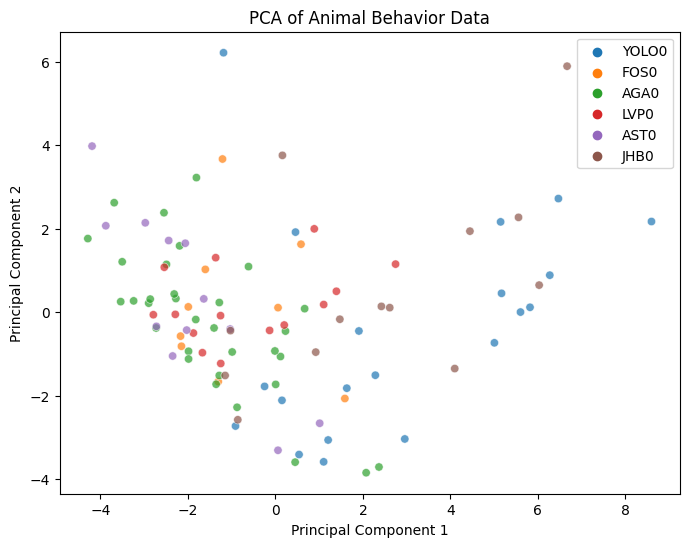

PCA Loadings:
    Prop_Beh_0  Prop_Beh_1  Prop_Beh_2  Prop_Beh_3  Trans_0_0  Trans_0_1  \
0   -0.294873    0.319126    0.295888   -0.106144  -0.295803   0.205562   
1   -0.245275    0.106327   -0.073714    0.380173  -0.242206  -0.224445   

   Trans_0_2  Trans_0_3  Trans_1_0  Trans_1_1  Trans_1_2  Trans_1_3  \
0   0.189051  -0.178441   0.200698   0.318429   0.271070   0.098309   
1  -0.303577   0.160894  -0.246944   0.107879   0.143817   0.207894   

   Trans_2_0  Trans_2_1  Trans_2_2  Trans_2_3  Trans_3_0  Trans_3_1  \
0   0.170413   0.269456   0.295196   0.189182  -0.181622   0.146394   
1  -0.269271   0.150607  -0.070882   0.198986   0.172563   0.224092   

   Trans_3_2  Trans_3_3  
0  -0.001636  -0.106006  
1   0.226266   0.379422  


In [35]:
import pandas as pd
import numpy as np
import glob
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load all six Excel files
file_paths = glob.glob("/Users/donglinhan/Desktop/TU2025/data_stage_5/Nonfed_reactive/*.xlsx")  # Update with correct file path
genotypes = [file.split('/')[-1].replace('.xlsx', '') for file in file_paths]  # Extract genotype names

all_data = []
labels = []

for i, file in enumerate(file_paths):
    df = pd.read_excel(file)  # Load each file
    df = df.dropna()  # Remove NaN values if any
    df = df.iloc[:, 1:]  # Assuming first column is a time index, use behavior columns only

    for col in df.columns:  # Each column is an individual
        indiv_behavior = df[col].values

        # Compute behavior proportions
        behavior_counts = np.bincount(indiv_behavior, minlength=4)  # Counts for 0,1,2,3
        behavior_proportions = behavior_counts / len(indiv_behavior)

        # Compute transition counts
        transitions = np.zeros((4, 4))  # 4x4 matrix for transitions between behaviors
        for j in range(len(indiv_behavior) - 1):
            transitions[indiv_behavior[j], indiv_behavior[j + 1]] += 1
        transitions = transitions.flatten() / len(indiv_behavior)  # Normalize transitions

        # Create feature vector (behavior proportions + transitions)
        feature_vector = np.concatenate((behavior_proportions, transitions))

        all_data.append(feature_vector)
        labels.append(genotypes[i])  # Store genotype label

# Step 2: Convert to DataFrame
feature_names = (
    [f'Prop_Beh_{i}' for i in range(4)] +  # Behavior proportions
    [f'Trans_{i}_{j}' for i in range(4) for j in range(4)]  # Behavior transitions
)

data_matrix = pd.DataFrame(all_data, columns=feature_names)
data_matrix['Genotype'] = labels  # Add genotype labels

# Step 3: Standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data_matrix.drop(columns=['Genotype']))

# Step 4: Perform PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Step 5: Visualize PCA Results
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['Genotype'] = labels  # Assign genotype labels

plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Genotype', palette='tab10', alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Animal Behavior Data')
plt.legend(loc='best')
plt.show()

# Step 6: Display PCA Loadings
loadings = pd.DataFrame(pca.components_, columns=feature_names)
print("PCA Loadings:\n", loadings)


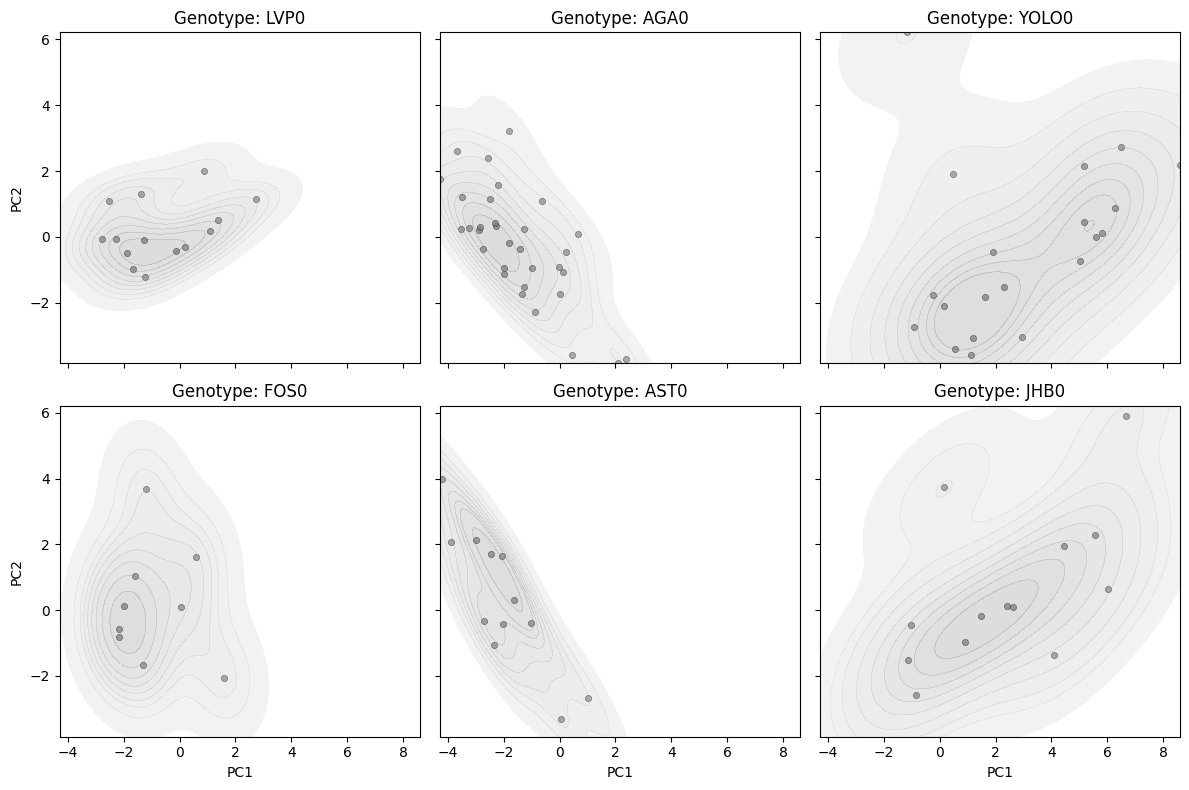

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import pandas as pd

# Define colors for genotypes
genotype_palette = sns.color_palette("tab10", len(set(labels)))

# Convert PCA results into a DataFrame
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['Genotype'] = labels  # Assign genotype labels

# Get axis limits from all data for consistency
x_min, x_max = pca_df['PC1'].min(), pca_df['PC1'].max()
y_min, y_max = pca_df['PC2'].min(), pca_df['PC2'].max()

# Create subplots (2 rows, 3 columns)
fig, axes = plt.subplots(2, 3, figsize=(12, 8), sharex=True, sharey=True)




# Define the desired genotype order
genotype_order = ["LVP0", "AGA0", "YOLO0", "FOS0", "AST0", "JHB0"]

axes = axes.flatten()  # Flatten the axes array to iterate easily

# Loop through the predefined genotype order
for i, genotype in enumerate(genotype_order):
    ax = axes[i]
    subset = pca_df[pca_df['Genotype'] == genotype]
    
    # Plot individuals
    sns.scatterplot(data=subset, x='PC1', y='PC2', color="#7f7f7f", alpha=0.7, s=20, edgecolor="black", ax=ax)
    
    # Add KDE contour for density representation
    sns.kdeplot(data=subset, x='PC1', y='PC2', fill=True, alpha=0.2, color="#7f7f7f", ax=ax)
    
    # Formatting
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_title(f"Genotype: {genotype}")
    ax.set_xlabel("PC1")
    ax.set_ylabel("PC2")

# Adjust layout
plt.tight_layout()
plt.savefig("output/pca_plots.svg", format="svg", bbox_inches="tight")  # Save as SVG



### Analysis of locomotor activity
##### Using behavioral classification exclusion to filter locomotor data


In [22]:
import os
import pandas as pd
import numpy as np


input_folder = "/Users/donglinhan/Desktop/TU2025/Locomotor_activity/Raw"
ref_folder = "/Users/donglinhan/Desktop/TU2025/Locomotor_activity/Ref"
output_folder = "/Users/donglinhan/Desktop/TU2025/Locomotor_activity/Filtered"


for filename in os.listdir(input_folder):
    if filename.endswith(".csv"):
        file_path = os.path.join(input_folder, filename)
        refname = filename.replace("_sum3.csv", ".xlsx")  # Replaces ".csv" with ".txt"
        ref_path = os.path.join(ref_folder, refname)
        df_csv = pd.read_csv(file_path)
        df_excel = pd.read_excel(ref_path)
        filtered_columns = [col.replace(".csv", "") for col in df_excel.columns]
        filtered_df = df_csv[filtered_columns]
        output_file = os.path.join(output_folder, refname)
        filtered_df.to_excel(output_file, index=False)
        
print(f"Done.")

Done.


In [29]:
import pandas as pd
import os

# Define folder containing Excel files
input_folder = "/Users/donglinhan/Desktop/TU2025/Locomotor_activity/Filtered"
output_folder = "/Users/donglinhan/Desktop/TU2025/Locomotor_activity/Binned"

# Ensure output folder exists
os.makedirs(output_folder, exist_ok=True)

# Process each Excel file in the folder
for file in os.listdir(input_folder):
    if file.endswith(".xlsx") or file.endswith(".xls"):  # Ensure it's an Excel file
        file_path = os.path.join(input_folder, file)
        
        # Read Excel file
        df = pd.read_excel(file_path)

        # Create a time index based on 1s intervals
        df.index = range(len(df))

        # Group every 12 rows (12 sec) and compute the mean for each group
        df_resampled = df.groupby(df.index // 12).mean()

        # Save the transformed data
        output_file_path = os.path.join(output_folder, f"resampled_{file}")
        df_resampled.to_excel(output_file_path, index=False)
        
        print(f"Processed: {file}")

Processed: YOLO0.xlsx
Processed: YOLO24.xlsx
Processed: FOS0.xlsx
Processed: LVP72.xlsx
Processed: LVP48.xlsx
Processed: LVP24.xlsx
Processed: YOLO72.xlsx
Processed: YOLO48.xlsx
Processed: FOS72.xlsx
Processed: FOS48.xlsx
Processed: AGA72.xlsx
Processed: JHB72.xlsx
Processed: JHB48.xlsx
Processed: AGA48.xlsx
Processed: AGA24.xlsx
Processed: JHB24.xlsx
Processed: AGA0.xlsx
Processed: FOS24.xlsx
Processed: LVP0.xlsx
Processed: AST0.xlsx
Processed: AST24.xlsx
Processed: JHB0.xlsx
Processed: AST72.xlsx
Processed: AST48.xlsx


In [35]:
input_folder = "/Users/donglinhan/Desktop/TU2025/Locomotor_activity/Filtered" 
output_file = "/Users/donglinhan/Desktop/TU2025/Locomotor_activity/Output/Locomotor_all.xlsx"  

def sort_key(col):
    behavior, file = col.rsplit("_", 1)  
    return (behavior, file) 

act = pd.DataFrame(index = range(100))

for filename in os.listdir(input_folder):
    if filename.endswith(".xlsx"):
        file_path = os.path.join(input_folder, filename)
        df = pd.read_excel(file_path)
        start = 180
        end = 180 + 60 * 8
        series = df.iloc[start:end]
        distance = []
        for i in series:
            dist = np.sum(series[i]) / 8
            distance.append(dist)
        distance_column_name = "Distance_" + f"{filename}"
        act[distance_column_name] = pd.Series(distance)
        
sorted_columns = sorted(act.columns, key=sort_key)
act = act[sorted_columns]
act.to_excel(output_file, index=False)
print(f"Done.")

Done.
